# **Dataset 3 Notebook**

**Import Statements**

In [172]:
# Install haversine if required
#!pip install haversine

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from tkinter import filedialog

from sklearn.impute import SimpleImputer

**Loading Data**

In [173]:
# Load the data
df = pd.read_csv('Dataset3.csv')

# Display the columns of the dataset
print("Fields of the dataset:")
print(df.columns)

print('\r\n')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()


Fields of the dataset:
Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


First few rows of the dataset:


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,3/23/2019 20:21,3/23/2019 20:27,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,3/4/2019 16:11,3/4/2019 16:19,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,3/27/2019 17:53,3/27/2019 18:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3/10/2019 1:23,3/10/2019 1:49,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,3/30/2019 13:27,3/30/2019 13:37,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**Feature Engineering**

**Generate Hours from DateTime**

In [174]:
# Convert 'pickup_datetime' to a datetime data type
df['pickup'] = pd.to_datetime(df['pickup'])

# Extract the date, time, and other components
df['hours'] = df['pickup'].dt.hour

In [175]:
df.drop(['pickup', 'dropoff','passengers','tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'] , inplace=True , axis= 1)
df.columns

Index(['distance', 'fare', 'hours'], dtype='object')

**Data Cleaning**

In [176]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the imputed dataset
df_imputed.head()

Missing values in the dataset:
distance    0
fare        0
hours       0
dtype: int64


,distance,fare,hours
0,1.60,7.0,20.0
1,0.79,5.0,16.0
2,1.37,7.5,17.0
3,7.70,27.0,1.0
4,2.16,9.0,13.0


**Data Visualization**

1. Frequency Distribution for Hours

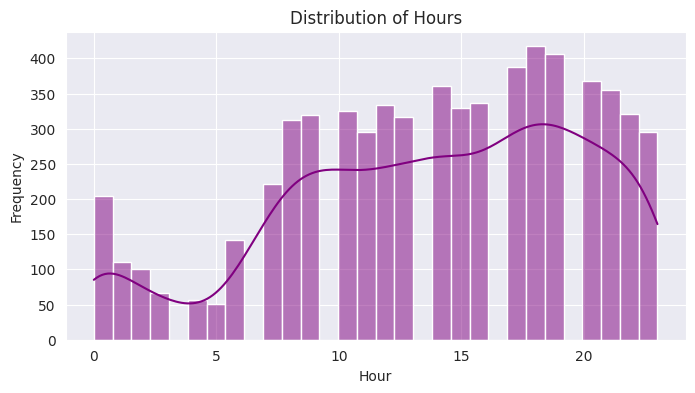

In [177]:
# Visualize the distribution of 'hours'
plt.figure(figsize=(8, 4))
sns.set_style(style='darkgrid')
sns.histplot(df['hours'], bins=30, kde=True, color='purple')
plt.title('Distribution of Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()


Removing Outliers

In [178]:
# Drop the rows where the fare amount is <=0 and distance is <=0
df.drop(df[df['fare']<=0].index,inplace=True)
df.drop(df[df['distance']<=0].index,inplace=True)

# Drop distance and fair amount outliers
df.drop(df[df['distance']>60].index,inplace=True)
df.drop(df[df['fare']>100].index,inplace=True)

# Drop unrealistic fair amounts and distance travelled
df.drop(df[(df['fare']>=100) & (df['distance']<=1)].index,inplace=True)
df.drop(df[(df['fare']<=100) & (df['distance']>=100)].index,inplace=True)

2. Distance versus Fare


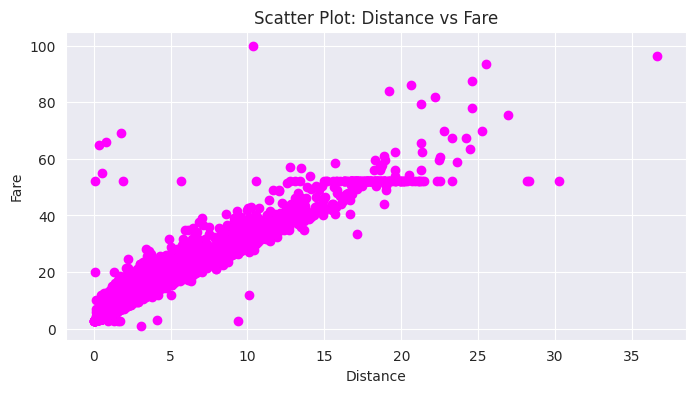

In [179]:
plt.figure(figsize=(8, 4))
plt.scatter(df['distance'], df['fare'], color = 'magenta')
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.title('Scatter Plot: Distance vs Fare')
plt.show()

In [180]:
x = df.drop(['fare'],axis = 1)
y = df['fare'].values.reshape(-1, 1)

**Feature Scaling**

In [181]:
# Standardize the remaining features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Standardize Values

In [182]:
std_Y = scaler.fit_transform(y)
std_X = scaler.fit_transform(x)

**Models and Evaluation**

**1. Linear Regression Model**

Split Data into Train and Test Sets

In [183]:
X_train, X_test, y_train, y_test = train_test_split(std_X, std_Y, test_size=0.2, random_state=42)

Train Linear Regression Model

In [184]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Predictions and Model Evaluation

In [185]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Mean Squared Error (MSE): {mse_lr:.6f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.6f}")
print(f"R-squared (R2): {r2_lr:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.6f}")


Mean Squared Error (MSE): 0.085758
Mean Absolute Error (MAE): 0.167021
R-squared (R2): 0.917004
Root Mean Squared Error (RMSE): 0.292846


**2. Random Rainforest Regressor**

Train Random Rainforest Regressor Model

In [186]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())


RandomForestRegressor(random_state=42)

Predictions and Model Evaluation


In [187]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.6f}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.6f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.6f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.6f}")


Random Forest - Mean Squared Error (MSE): 0.104209
Random Forest - Mean Absolute Error (MAE): 0.164045
Random Forest - R-squared (R2): 0.899148
Random Forest - Root Mean Squared Error (RMSE): 0.322813


**Gradient Boosting Regression**

Train Gradient Boosting Model

In [188]:
from sklearn.ensemble import GradientBoostingRegressor
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train.ravel())


GradientBoostingRegressor(random_state=42)

Predictions and Model Evaluation

In [189]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb:.6f}")
print(f"Gradient Boosting - Mean Absolute Error (MAE): {mae_gb:.6f}")
print(f"Gradient Boosting - R-squared (R2): {r2_gb:.6f}")
print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb:.6f}")


Gradient Boosting - Mean Squared Error (MSE): 0.088455
Gradient Boosting - Mean Absolute Error (MAE): 0.146901
Gradient Boosting - R-squared (R2): 0.914394
Gradient Boosting - Root Mean Squared Error (RMSE): 0.297414


**Model Prediction Comparisons**

In [190]:
# Create a dictionary with all predictions
df = {'Actual': y_test[:25], 'Predicted (LR)': y_pred_lr[:25], 'Predicted (RF)': y_pred_rf[:25], 'Predicted (GB)': y_pred_gb[:25]}

# Print the tabulated results
from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+------------+------------------+------------------+------------------+
|     Actual |   Predicted (LR) |   Predicted (RF) |   Predicted (GB) |
|------------+------------------+------------------+------------------|
|  0.282123  |        0.218897  |        0.235676  |        0.398937  |
| -0.226678  |       -0.355577  |       -0.420129  |       -0.36701   |
| -0.45795   |       -0.564633  |       -0.588666  |       -0.574577  |
| -0.319187  |       -0.380498  |       -0.490051  |       -0.331592  |
|  0.05085   |       -0.0906408 |        0.141216  |        0.0273013 |
|  0.605905  |        0.470518  |        0.471536  |        0.479524  |
| -0.0879137 |       -0.0104423 |       -0.0718711 |        0.0132745 |
|  1.20721   |        1.40711   |        1.24124   |        1.51956   |
| -0.45795   |       -0.340476  |       -0.255888  |       -0.239676  |
| -0.966751  |       -0.347852  |       -0.473507  |       -0.413243  |
| -0.226678  |       -0.0887582 |        0.0987621 |        0.02

**Data Visualization: Actual vs Predicted Fare**

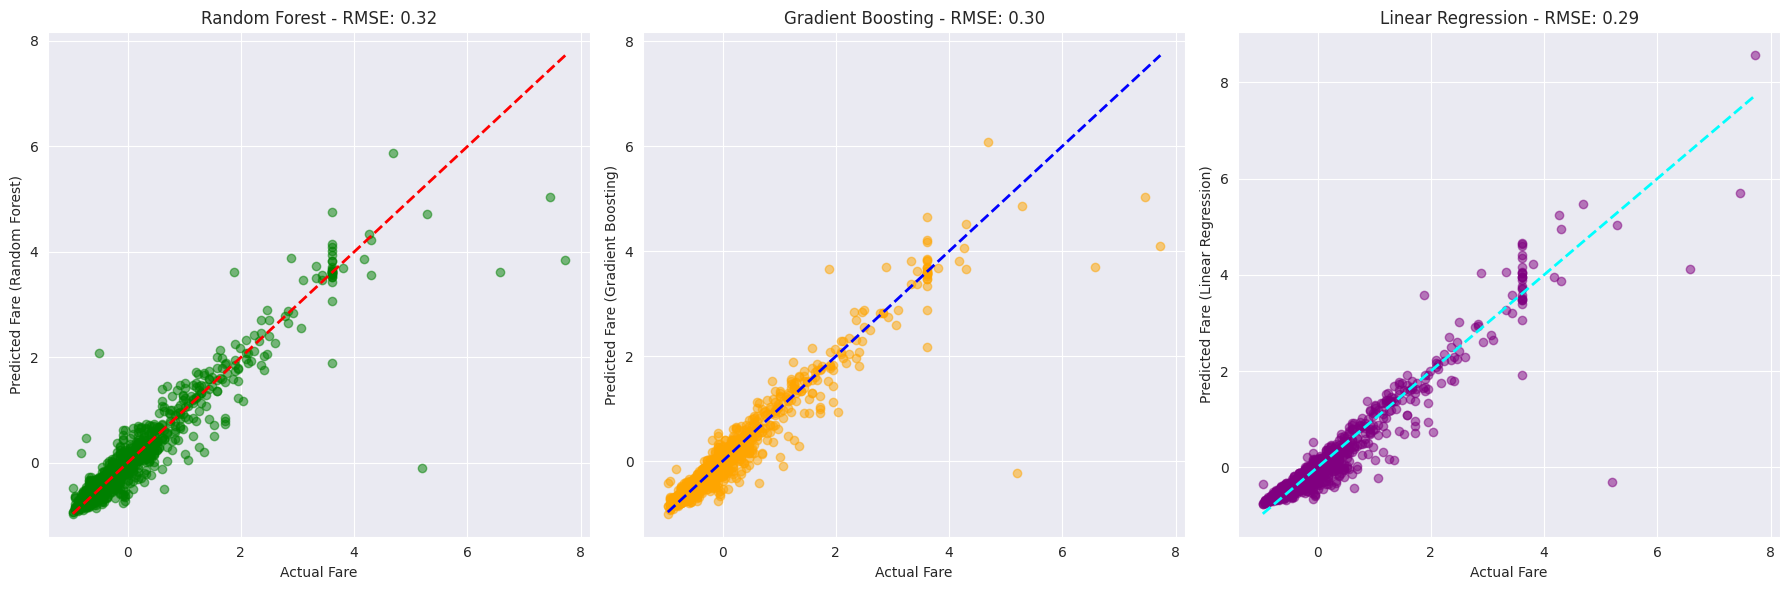

In [191]:
# Data visualization: Actual vs Predicted
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Random Forest)')
plt.title(f'Random Forest - RMSE: {rmse_rf:.2f}')

plt.subplot(132)
plt.scatter(y_test, y_pred_gb, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Gradient Boosting)')
plt.title(f'Gradient Boosting - RMSE: {rmse_gb:.2f}')

plt.subplot(133)
plt.scatter(y_test, y_pred_lr, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='cyan', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare (Linear Regression)')
plt.title(f'Linear Regression - RMSE: {rmse_lr:.2f}')

plt.tight_layout()
plt.show()